In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline
CSV_PATH = "auto_sales_sample.csv"


In [4]:
df = pd.read_csv(CSV_PATH)
print("Shape:", df.shape)
display(df.head())
print("\nMissing values:"); display(df.isnull().sum())
print("\nNumeric summary:"); display(df.describe())


Shape: (50, 8)


,VehicleID,Make,Model,Year,Mileage,ListPrice,DaysOnLot,FastSale
0,V0001,Ford,Fusion,2024,68156,67691,23,1
1,V0002,Ford,Focus,2022,92124,85580,45,0
2,V0003,BMW,3 Series,2017,61197,76809,35,0
3,V0004,Ford,Fusion,2023,53583,84441,27,1
4,V0005,BMW,3 Series,2015,51834,82218,23,1



Missing values:


VehicleID    0
Make         0
Model        0
Year         0
Mileage      0
ListPrice    0
DaysOnLot    0
FastSale     0
dtype: int64


Numeric summary:


,Year,Mileage,ListPrice,DaysOnLot,FastSale
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2018.100000,64523.860000,81577.160000,34.460000,0.320000
std,3.512369,13407.401273,19343.974984,8.569547,0.471212
min,2012.000000,39330.000000,39553.000000,15.000000,0.000000
25%,2015.000000,55990.500000,67388.750000,26.250000,0.000000
50%,2018.500000,64444.000000,81206.000000,35.000000,0.000000
75%,2021.000000,72611.500000,96133.250000,41.000000,1.000000
max,2024.000000,99502.000000,129264.000000,52.000000,1.000000


In [5]:
df_clean = df.copy()

# Numeric / categorical split
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df_clean.columns if c not in num_cols]

# Fill nulls
for c in num_cols:
    df_clean[c] = df_clean[c].fillna(df_clean[c].median())
for c in cat_cols:
    m = df_clean[c].mode(dropna=True)
    df_clean[c] = df_clean[c].fillna(m.iloc[0] if len(m) else "Unknown")

# Drop duplicates
before = len(df_clean)
df_clean = df_clean.drop_duplicates()
after = len(df_clean)

print(f"Duplicates removed: {before-after}")
print("Nulls after cleaning:")
display(df_clean.isnull().sum())

# Save cleaned dataset
df_clean.to_csv("cleaned_auto_sales.csv", index=False)
print("Saved: cleaned_auto_sales.csv")


Duplicates removed: 0
Nulls after cleaning:


VehicleID    0
Make         0
Model        0
Year         0
Mileage      0
ListPrice    0
DaysOnLot    0
FastSale     0
dtype: int64

Saved: cleaned_auto_sales.csv


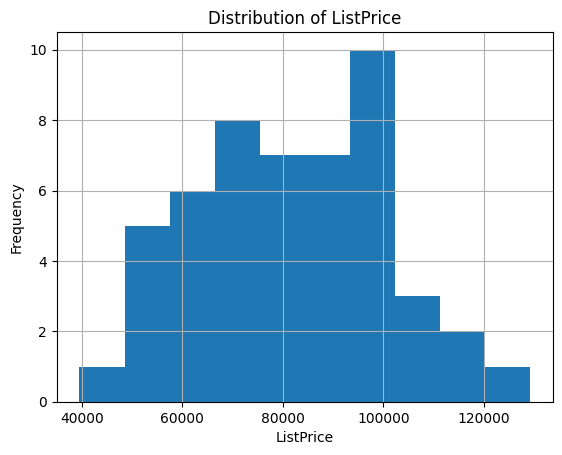

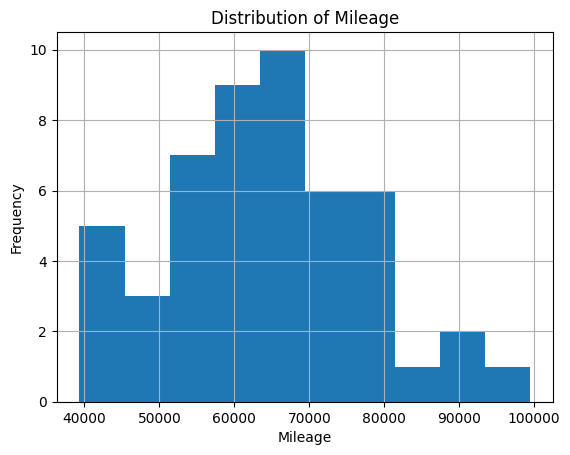

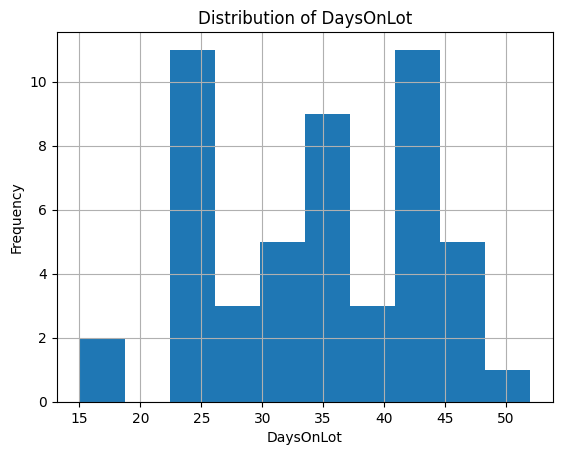

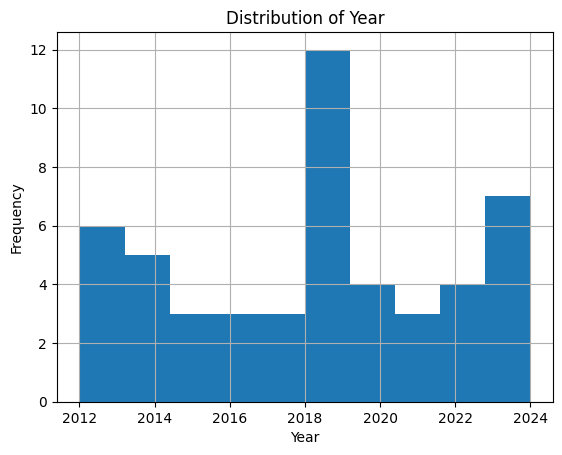


Avg DaysOnLot by Make:


Make
Toyota    32.857143
BMW       33.266667
Honda     34.454545
Ford      36.176471
Name: DaysOnLot, dtype: float64


FastSale rate by Model:


Model
Corolla     0.666667
Fusion      0.500000
Civic       0.444444
3 Series    0.375000
Camry       0.250000
Focus       0.222222
Accord      0.000000
5 Series    0.000000
Name: FastSale, dtype: float64

In [6]:
for col in ["ListPrice","Mileage","DaysOnLot","Year"]:
    if col in df_clean.columns:
        plt.figure()
        df_clean[col].hist()
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

print("\nAvg DaysOnLot by Make:")
display(df_clean.groupby("Make")["DaysOnLot"].mean().sort_values())

print("\nFastSale rate by Model:")
display(df_clean.groupby("Model")["FastSale"].mean().sort_values(ascending=False))


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_clean[["Year","Mileage","ListPrice","DaysOnLot"]]
y = df_clean["FastSale"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, preds),3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature importances:")
display(importances)


Accuracy: 1.0

Confusion Matrix:
 [[7 0]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Feature importances:


DaysOnLot    0.785403
Year         0.083504
ListPrice    0.077757
Mileage      0.053336
dtype: float64